<a href="https://colab.research.google.com/github/AbigailBG153/Complejidad_Algoritmica/blob/main/TF_Complejidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFS SUGERENCIA

In [5]:
new_data = pd.read_csv('/content/datosFragmento1.csv')
data = new_data.head(1999)
data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,1,"LuvLap Memory Foam Baby Head Shaping Pillow, B...",home & kitchen,Bedroom Linen,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/LuvLap-Shaping-Preventin...,4.1,68,6.228,7.788
1,2,"CELLEBII® Coin Purse,3D Fruit Coin Pouch Bag f...",accessories,Bags & Luggage,https://m.media-amazon.com/images/I/51VAaZ2EIe...,https://www.amazon.in/CELLEBII%C2%AE-Wallet-He...,1.0,3,1.776,5.988
2,3,Flavia Women's Ballet Flats,women's shoes,Ballerinas,https://m.media-amazon.com/images/I/81+isseKkz...,https://www.amazon.in/Flavia-Flats-4-20181-34-...,3.7,112,2.388,11.988
3,4,BSB HOME String Fashion Home Furnishing 160 Tc...,home & kitchen,Bedroom Linen,https://m.media-amazon.com/images/I/61-IcFWsss...,https://www.amazon.in/BSB-HOME-Furnishing-Tc-F...,5.0,2,3.588,9.588
4,5,Lucario 6mm 20mm 66-Degree Ultra Wide Angle Ey...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/21j10bX2j7...,https://www.amazon.in/Lucario-66-Degree-Ultra-...,3.9,3,7.188,11.988


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


<ipython-input-1-dc5059eb52bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columnas_int64] = data[columnas_int64].fillna(0)


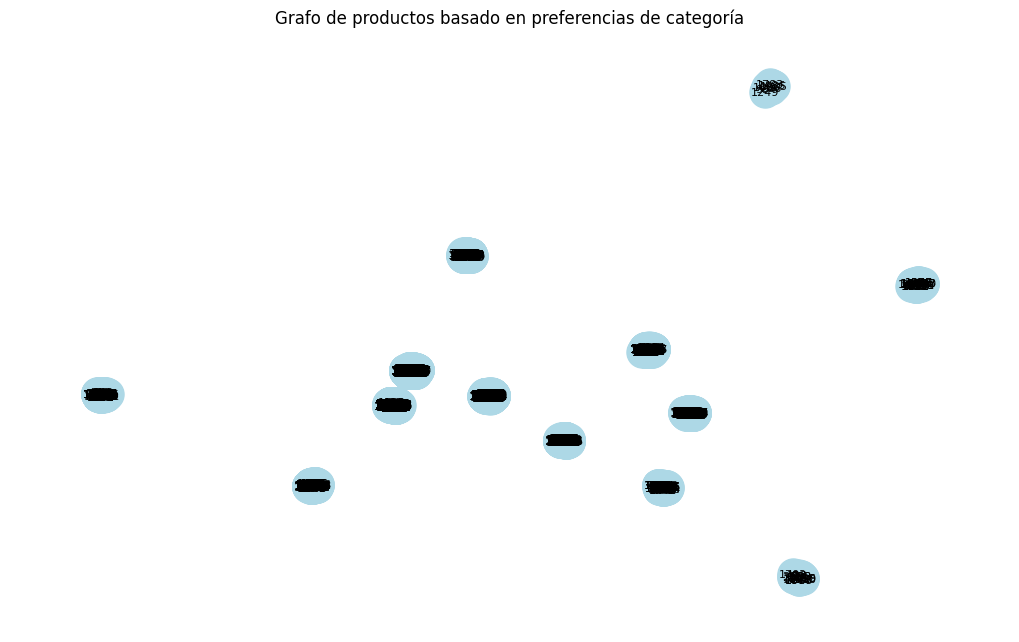

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Datos originales
new_data = pd.read_csv('/content/datosFragmento1.csv')
data = new_data.head(1999)

# Rellenar los valores faltantes en columnas de tipo int64 con 0
columnas_int64 = data.select_dtypes(include=['int64']).columns
data[columnas_int64] = data[columnas_int64].fillna(0)

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo (productos)
for i, product in data.iterrows():
    G.add_node(i, name=product['name'], main_category=product['main_category'], sub_category=product['sub_category'])

# Agregar aristas al grafo (preferencias del usuario)
preference = 'main_category'  # Puedes cambiar esto a 'sub_category' si deseas basarte en la subcategoría

# Agrupar los productos por preferencia
groups = data.groupby(preference)

# Agregar aristas dentro de cada grupo
for group_name, group_data in groups:
    product_ids = group_data.index.tolist()
    for i in range(len(product_ids)):
        for j in range(i + 1, len(product_ids)):
            G.add_edge(product_ids[i], product_ids[j])

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42)  # Posición de los nodos
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, edge_color='gray')
plt.title("Grafo de productos basado en preferencias de categoría")
plt.show()


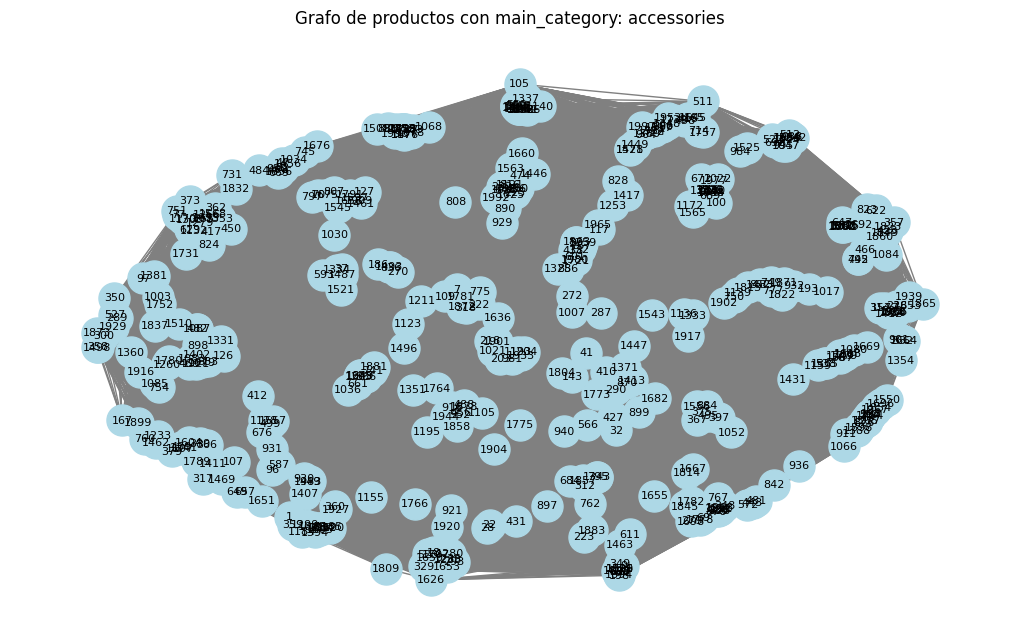

In [7]:
# Filtrar los datos para obtener solo los productos con main_category: accessories
filtered_data = data[data['main_category'] == 'accessories']

# Crear un grafo vacío
G = nx.Graph()

# Agregar los nodos al grafo
for i, product in filtered_data.iterrows():
    G.add_node(i, name=product['name'], main_category=product['main_category'])

# Agregar las aristas al grafo
for i, product1 in filtered_data.iterrows():
    for j, product2 in filtered_data.iterrows():
        if i != j:
            G.add_edge(i, j)

# Visualizar el grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Asignar una posición a los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, edge_color='gray')
plt.title("Grafo de productos con main_category: accessories")
plt.show()

In [11]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def visualizar_dfs(G, visited_nodes, visited_edges, start_node, end_nodes, path):
    # Crear un subgrafo con los nodos y aristas visitados en la búsqueda en profundidad
    subgraph = G.subgraph(visited_nodes)
    subgraph_edges = [(u, v) for u, v in subgraph.edges() if (u, v) in visited_edges or (v, u) in visited_edges]

    # Visualizar el grafo con los nodos y aristas visitados en diferentes colores
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=visited_nodes, node_color='red', node_size=500, label='Nodos visitados')
    nx.draw_networkx_edges(G, pos, edgelist=subgraph_edges, edge_color='red', width=2, label='Aristas visitadas')
    nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=500, label='Nodo de inicio')
    nx.draw_networkx_nodes(G, pos, nodelist=end_nodes, node_color='blue', node_size=500, label='Productos sugeridos')
    nx.draw_networkx_edges(G, pos, edgelist=path, edge_color='blue', width=2, label='Recorrido')
    plt.title("Grafo con recorrido DFS y productos sugeridos")
    plt.legend(loc='upper right')
    plt.show()

def dfs_recursivo(G, node, visited_nodes, visited_edges, suggestions):
    visited_nodes.add(node)
    neighbors = list(G.neighbors(node))
    for neighbor in neighbors:
        if neighbor not in visited_nodes:
            visited_edges.add((node, neighbor))
            suggestions.append((node, neighbor))
            dfs_recursivo(G, neighbor, visited_nodes, visited_edges, suggestions)


Recorrido realizado durante la búsqueda en profundidad:
(226, 232)
(99, 100)
(898, 899)
(1698, 1706)
(930, 931)
(1949, 1953)
(8, 9)
(808, 816)
(1798, 1802)
(469, 474)
(931, 932)
(1731, 1739)
(383, 389)
(362, 366)
(1381, 1388)
(1664, 1667)
(1813, 1814)
(22, 28)
(225, 226)
(468, 469)
(317, 318)
(1676, 1677)
(409, 410)
(1204, 1211)
(250, 255)
(676, 683)
(318, 319)
(760, 762)
(1920, 1921)
(657, 660)
(1299, 1305)
(218, 222)
(272, 279)
(450, 456)
(100, 105)
(1337, 1340)
(1532, 1543)
(1791, 1794)
(901, 904)
(1904, 1909)
(1883, 1895)
(1565, 1567)
(1853, 1854)
(826, 828)
(1328, 1331)
(195, 198)
(357, 358)
(373, 375)
(198, 203)
(449, 450)
(117, 126)
(417, 427)
(660, 661)
(1447, 1449)
(358, 359)
(1750, 1752)
(601, 611)
(1469, 1482)
(380, 383)
(1901, 1902)
(1170, 1176)
(1431, 1446)
(1428, 1431)
(1095, 1105)
(689, 692)
(899, 901)
(1557, 1563)
(1650, 1651)
(622, 629)
(1498, 1504)
(1660, 1664)
(312, 314)
(1132, 1136)
(1823, 1825)
(552, 560)
(1354, 1355)
(1764, 1766)
(1675, 1676)
(1837, 1845)
(675, 67

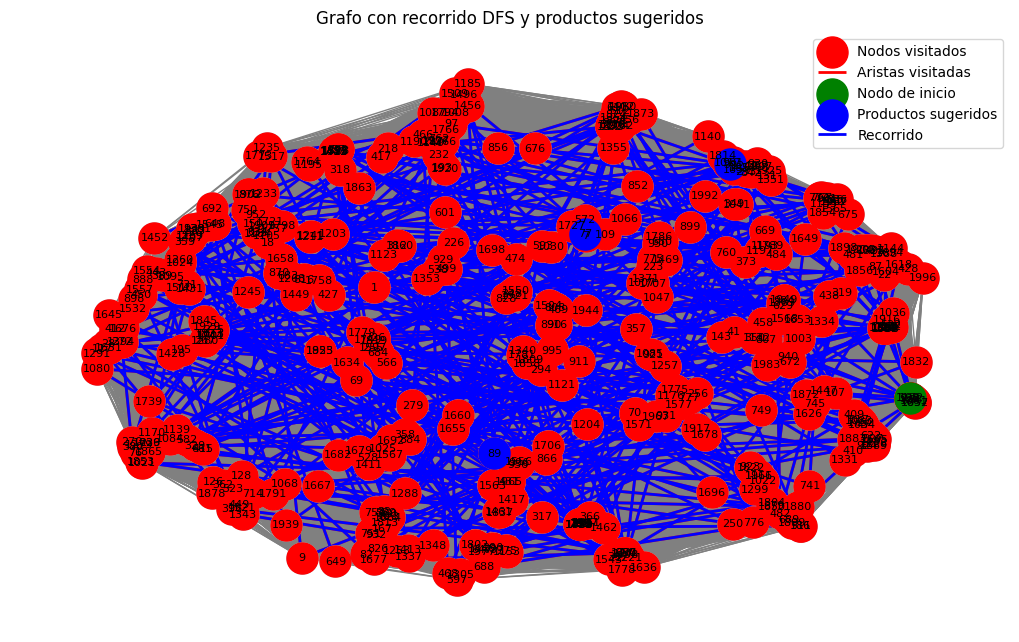

In [15]:
def sugerencia(G, filtered_data,start_product):
    # Obtener el nodo de partida según el nombre del producto
    start_node = None
    for node, data in G.nodes(data=True):
        if data['name'] == start_product:
            start_node = node
            break

    if start_node is None:
        print("El producto ingresado no existe en el grafo.")
        return

    # Realizar la búsqueda en profundidad (DFS)
    visited_nodes = set()
    visited_edges = set()
    suggestions = []
    dfs_recursivo(G, start_node, visited_nodes, visited_edges, suggestions)

    # Filtrar las sugerencias de productos que tienen relación con el producto inicial
    filtered_suggestions = []
    for suggestion in suggestions:
        source_node = suggestion[0]
        target_node = suggestion[1]
        if G.nodes[target_node]['name'] != start_product:
            filtered_suggestions.append(suggestion)

    # Ordenar las sugerencias por rating de mayor a menor
    filtered_suggestions.sort(key=lambda x: filtered_data.loc[x[1], 'ratings'], reverse=True)

    # Imprimir el recorrido
    print("Recorrido realizado durante la búsqueda en profundidad:")
    for edge in visited_edges:
        print(edge)

    # Imprimir todos los datos de los productos sugeridos
    print("\nProductos sugeridos para comprar:")
    for suggestion in filtered_suggestions[:3]:
        target_node = suggestion[1]
        product_data = filtered_data.loc[target_node]
        print(product_data)
        print()

    # Obtener los nodos finales de las sugerencias para visualizar en el grafo
    end_nodes = [suggestion[1] for suggestion in filtered_suggestions[:3]]

    # Visualizar el grafo con recorrido DFS y productos sugeridos
    visualizar_dfs(G, visited_nodes, visited_edges, start_node, end_nodes, suggestions)


# Ejemplo de uso

start_node = 'Imported Metallic Key chain Compatible with Royal Enfield, Men and Women Royal RE Classic Bullet Bike Keychains, Multicolor'
sugerencia(G, filtered_data,start_node)


In [6]:

import pandas as pd
import networkx as nx



def dfs_recursivo(G, node, visited_nodes, visited_edges, suggestions):
    visited_nodes.add(node)
    neighbors = list(G.neighbors(node))
    for neighbor in neighbors:
        if neighbor not in visited_nodes:
            visited_edges.add((node, neighbor))
            suggestions.append((node, neighbor))
            dfs_recursivo(G, neighbor, visited_nodes, visited_edges, suggestions)

def sugerir_productos(G, start_product, data):
    suggestions = []
    visited_nodes = set()
    visited_edges = set()

    dfs_recursivo(G, start_product, visited_nodes, visited_edges, suggestions)

    suggested_products = []

    for suggestion in suggestions:
        target_node = suggestion[1]
        product_data = data.loc[target_node]
        suggested_products.append(product_data)

    return suggested_products



def sugerir():
    data = pd.read_csv('/content/datosFragmento1.csv')
    start_product = 'Imported Metallic Key chain Compatible with Royal Enfield, Men and Women Royal RE Classic Bullet Bike Keychains, Multicolor'
    filtered_data = data[data['main_category'] == 'accessories']

    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar los nodos al grafo
    for i, product in filtered_data.iterrows():
        G.add_node(i, name=product['name'], main_category=product['main_category'])

    # Agregar las aristas al grafo
    for i, product1 in filtered_data.iterrows():
        for j, product2 in filtered_data.iterrows():
            if i != j:
                G.add_edge(i, j)

    suggested_products = sugerir_productos(G, start_product, filtered_data)

    return suggested_products

print(sugerir())

NetworkXError: ignored

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def cargar_datos():
    # Datos originales
    new_data = pd.read_csv('/content/datosFragmento1.csv')
    data = new_data.head(50)
    columnas_int64 = data.select_dtypes(include=['int64']).columns
    data[columnas_int64] = data[columnas_int64].fillna('')
    data = data.drop(columnas_int64, axis=1)
    return data

def generarPrincipal(data):
    # Crear un grafo vacío
    G = nx.Graph()
    # Agregar nodos al grafo (productos)
    for i, product in data.iterrows():
        G.add_node(i, name=product['name'], main_category=product['main_category'], sub_category=product['sub_category'])

    # Agregar aristas al grafo (preferencias del usuario)
    preference = 'main_category'  # Puedes cambiar esto a 'sub_category' si deseas basarte en la subcategoría

    # Agrupar los productos por preferencia
    groups = data.groupby(preference)
    # Agregar aristas dentro de cada grupo
    for group_name, group_data in groups:
        product_ids = group_data.index.tolist()
        for i in range(len(product_ids)):
            for j in range(i + 1, len(product_ids)):
                G.add_edge(product_ids[i], product_ids[j])
    return G

def subGrafo(filtered_data):
    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar los nodos al grafo
    for i, product in filtered_data.iterrows():
        G.add_node(i, name=product['name'], main_category=product['main_category'])

    # Agregar las aristas al grafo
    for i, product1 in filtered_data.iterrows():
        for j, product2 in filtered_data.iterrows():
            if i != j:
                G.add_edge(i, j)

    return G

def dfs_recursivo(G, node, visited_nodes, visited_edges, suggestions):
    visited_nodes.add(node)
    neighbors = list(G.neighbors(node))
    for neighbor in neighbors:
        if neighbor not in visited_nodes:
            visited_edges.add((node, neighbor))
            suggestions.append((node, neighbor))
            dfs_recursivo(G, neighbor, visited_nodes, visited_edges, suggestions)

def sugerencia(G, filtered_data, start_product):
    # Obtener el nodo de partida según el nombre del producto
    start_node = start_product
    for node, data in G.nodes(data=True):
        if data['name'] == start_product:
            start_node = node
            break

    if start_node is None:
        print("El producto ingresado no existe en el grafo.")
        return

    # Realizar la búsqueda en profundidad (DFS)
    visited_nodes = set()
    visited_edges = set()
    suggestions = []
    dfs_recursivo(G, start_node, visited_nodes, visited_edges, suggestions)

    # Filtrar las sugerencias de productos que tienen relación con el producto inicial
    filtered_suggestions = []
    for suggestion in suggestions:
        source_node = suggestion[0]
        target_node = suggestion[1]
        if G.nodes[target_node]['name'] != start_product:
            filtered_suggestions.append(suggestion)

    # Ordenar las sugerencias por rating de mayor a menor
    filtered_suggestions.sort(key=lambda x: filtered_data.loc[x[1], 'ratings'], reverse=True)

    # Imprimir el recorrido
    print("Recorrido realizado durante la búsqueda en profundidad:")
    for edge in visited_edges:
        print(edge)

    # Imprimir todos los datos de los productos sugeridos
    print("\nProductos sugeridos para comprar:")
    for suggestion in filtered_suggestions[:3]:
        target_node = suggestion[1]
        product_data = filtered_data.loc[target_node]
        print(product_data)
        print()

# Ejemplo de uso
data = cargar_datos()

filtered_data = data[data['main_category'] == 'accessories']

G = subGrafo(filtered_data)
start_node = 'Handcuffs Unisex Cotton Baseball Cap'
sugerencia(G, filtered_data, start_node)


Recorrido realizado durante la búsqueda en profundidad:
(32, 37)
(8, 1)
(28, 32)
(37, 41)
(7, 9)
(1, 7)
(9, 18)
(18, 22)
(41, 47)
(22, 28)

Productos sugeridos para comprar:
name              Boldfit Waist Bag for Men Travel Bag for Men C...
main_category                                           accessories
sub_category                                         Bags & Luggage
image             https://m.media-amazon.com/images/W/IMAGERENDE...
link              https://www.amazon.in/Boldfit-Travel-Accessori...
ratings                                                         4.7
no_of_ratings                                                   376
discount_price                                                3.588
actual_price                                                  9.588
Name: 41, dtype: object

name              Readyshop go Girls Unicorn Bag Soft Tote Handb...
main_category                                           accessories
sub_category                                         

<ipython-input-21-1e8e9d5570c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columnas_int64] = data[columnas_int64].fillna('')
